In [2]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

In [3]:
url = 'https://ultralytics.com/images/bus.jpg'
res=urllib.request.urlopen(url)
image=np.asarray(bytearray(res.read()),dtype=np.uint8)
img=cv2.imdecode(image,cv2.IMREAD_COLOR)
resized=cv2.resize(img,(400,400),interpolation=cv2.INTER_CUBIC)

# Translation

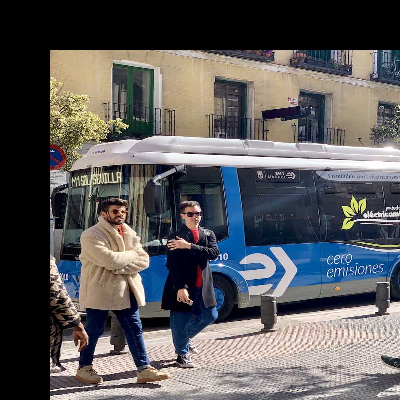

In [8]:
tx=50
ty=50
metrix=np.array([[1,0,tx],[0,1,ty]],dtype=np.float64)

# First row [1, 0, tx]:
# 1: No scaling in x-direction.
# 0: No shearing.
# tx: Shift (translate) x-axis by tx pixels.

# Second row [0, 1, ty]:

# 0: No shearing.
# 1: No scaling in y-direction.
# ty: Shift (translate) y-axis by ty pixels.

In [ ]:
translaion=cv2.warpAffine(resized,metrix,(resized.shape[1],resized.shape[0]))
cv2_imshow(translaion)

# Rotation

(200, 200)


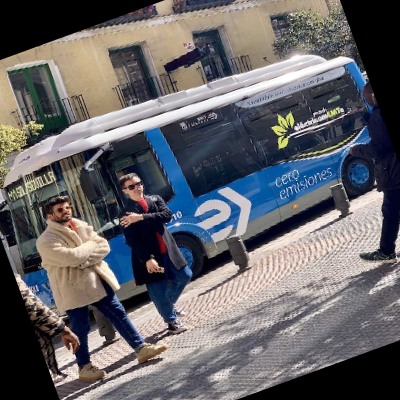

In [12]:
center=(resized.shape[1]//2,resized.shape[0]//2)
print(center)
angle=20
scale_factor=1
metrix=cv2.getRotationMatrix2D(center,angle,scale_factor)
rotation=cv2.warpAffine(resized,metrix,(resized.shape[1],resized.shape[0]))
cv2_imshow(rotation)

# Sheering

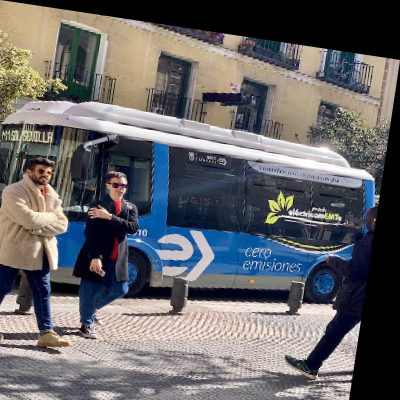

In [13]:
sheer_x=-.15
sheer_y=.15
metrix=np.array([[1,sheer_x,0,],[sheer_y,1,0]],dtype=np.float64)
sheer=cv2.warpAffine(resized,metrix,(resized.shape[1],resized.shape[0]))
cv2_imshow(sheer)

# Scaling

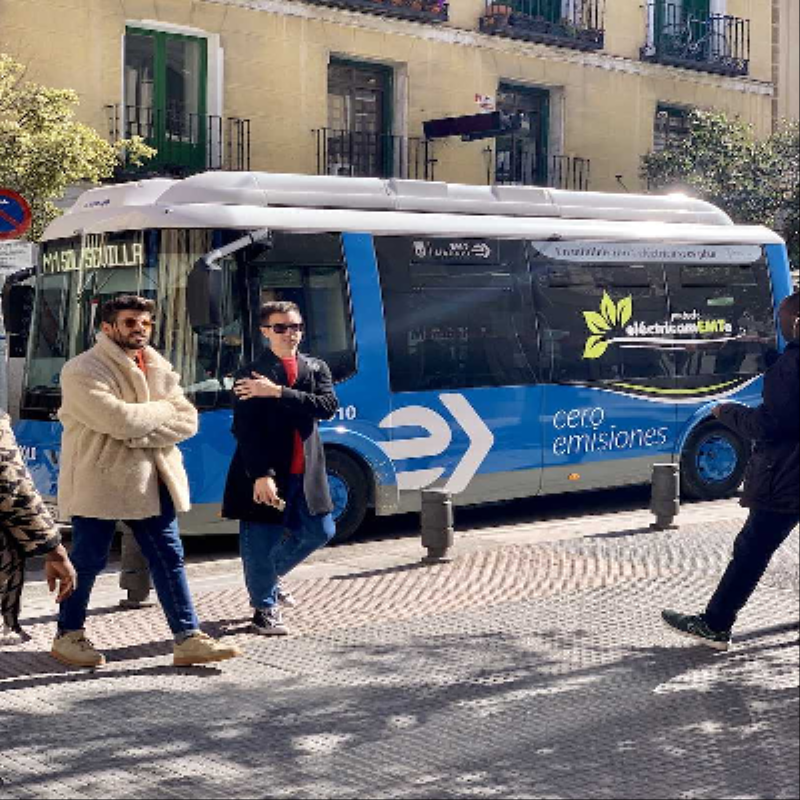

(800, 800, 3)


In [16]:
Sx=2
Sy=2
output_width = int(resized.shape[1] * Sx)
output_height = int(resized.shape[0] * Sy)
scaling = cv2.warpAffine(resized, metrix, (output_width, output_height))
cv2_imshow(scaling)
print(scaling.shape)